# Using ta-lib abstract functions with mplchart

In [1]:
import pandas as pd
import yfinance as yf

import talib

from talib.abstract import Function

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks


In [2]:
functions = [Function(name).info for name in talib.get_functions()]
functions = pd.DataFrame(functions).set_index("name")
functions

,group,display_name,function_flags,input_names,parameters,output_flags,output_names
name,,,,,,,
HT_DCPERIOD,Cycle Indicators,Hilbert Transform - Dominant Cycle Period,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_DCPHASE,Cycle Indicators,Hilbert Transform - Dominant Cycle Phase,[Function has an unstable period],{'price': 'close'},{},{'real': ['Line']},[real]
HT_PHASOR,Cycle Indicators,Hilbert Transform - Phasor Components,[Function has an unstable period],{'price': 'close'},{},"{'inphase': ['Line'], 'quadrature': ['Dashed L...","[inphase, quadrature]"
HT_SINE,Cycle Indicators,Hilbert Transform - SineWave,[Function has an unstable period],{'price': 'close'},{},"{'sine': ['Line'], 'leadsine': ['Dashed Line']}","[sine, leadsine]"
HT_TRENDMODE,Cycle Indicators,Hilbert Transform - Trend vs Cycle Mode,[Function has an unstable period],{'price': 'close'},{},{'integer': ['Line']},[integer]
...,...,...,...,...,...,...,...
NATR,Volatility Indicators,Normalized Average True Range,[Function has an unstable period],"{'prices': ['high', 'low', 'close']}",{'timeperiod': 14},{'real': ['Line']},[real]
TRANGE,Volatility Indicators,True Range,None,"{'prices': ['high', 'low', 'close']}",{},{'real': ['Line']},[real]
AD,Volume Indicators,Chaikin A/D Line,None,"{'prices': ['high', 'low', 'close', 'volume']}",{},{'real': ['Line']},[real]


In [3]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2019-09-16 00:00:00-04:00,52.671285,53.251874,52.630161,53.196232,84632400,0.0,0.0
2019-09-17 00:00:00-04:00,53.210743,53.418787,53.007535,53.389755,73274800,0.0,0.0
2019-09-18 00:00:00-04:00,53.476845,53.909868,53.084950,53.890514,101360000,0.0,0.0
2019-09-19 00:00:00-04:00,53.706659,54.130004,53.309925,53.452656,88242400,0.0,0.0
2019-09-20 00:00:00-04:00,53.554261,53.839714,52.608388,52.671284,221652400,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,220.820007,221.270004,216.710007,220.910004,67180000,0.0,0.0
2024-09-10 00:00:00-04:00,218.919998,221.479996,216.729996,220.110001,51591000,0.0,0.0
2024-09-11 00:00:00-04:00,221.460007,223.089996,217.889999,222.660004,44587100,0.0,0.0


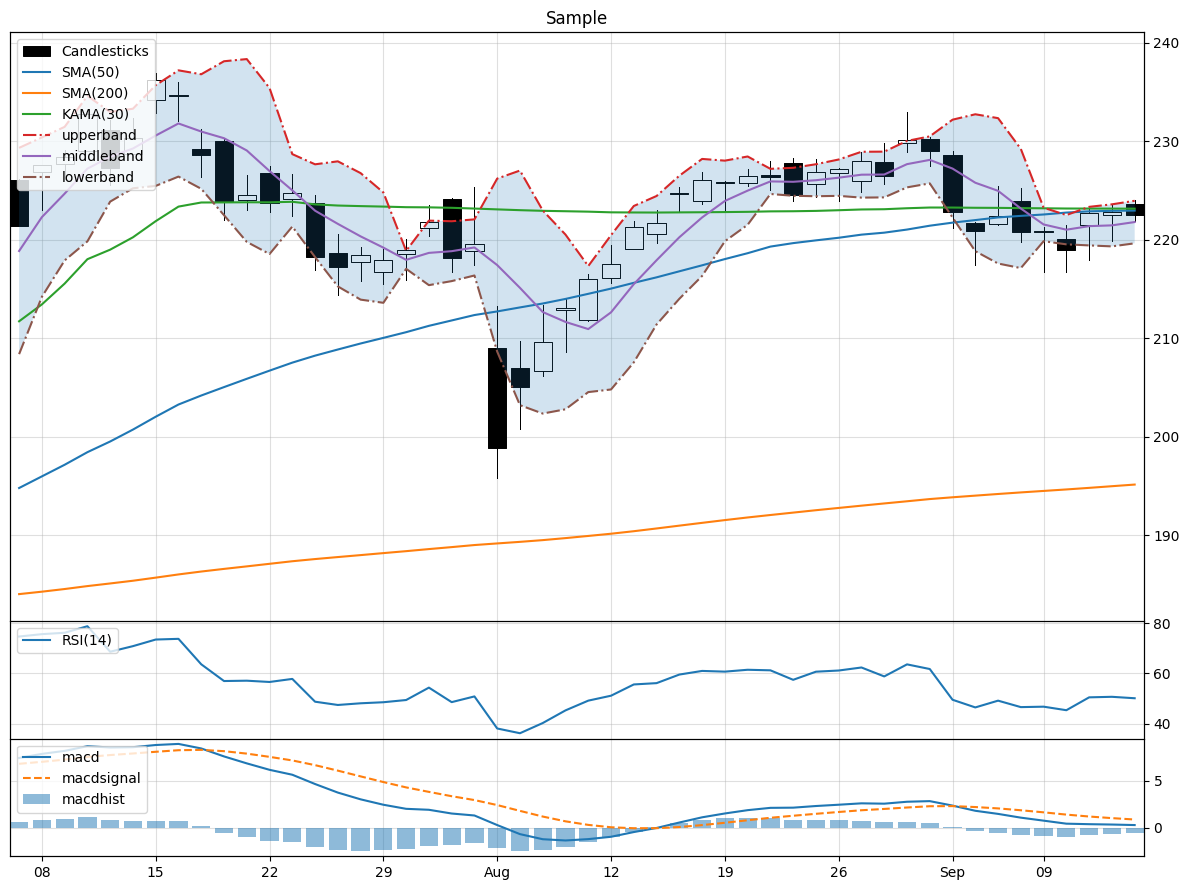

In [4]:
max_bars = 50
indicators = [
    Candlesticks(),
    Function("SMA", 50),
    Function("SMA", 200),
    Function("KAMA"),
    Function("BBANDS"),
    Function("RSI"),
    Function("MACD"),
]

chart = Chart(title="Sample", max_bars=max_bars)
chart.plot(prices, indicators)